## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [2]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [3]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
for idx, val in enumerate(text):
    text[idx] = val.lower()

text = ''.join(text)
len(text)

100225

In [4]:
assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [5]:
# !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
# with open('onegin.txt', 'r') as iofile:
#     text = iofile.readlines()
    
# text = [x.replace('\t\t', '') for x in text]

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [6]:
# # Join all the strings into one and lowercase it
# # Put result into variable text.

# # Your great code here
# for idx, val in enumerate(text):
#     text[idx] = val.lower()

# text = ''.join(text)


Put all the characters, that you've seen in the text, into variable `tokens`.

In [7]:
tokens = sorted(set(list(text)))
tokens

['\n',
 ' ',
 '!',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [8]:
# dict <index>:<char>
# Your great code here
token_to_idx = {token: idx for idx, token in enumerate(tokens)}

# dict <char>:<index>
# Your great code here
idx_to_token = {idx: token for idx, token in enumerate(tokens)}

idx_to_token

{0: '\n',
 1: ' ',
 2: '!',
 3: "'",
 4: '(',
 5: ')',
 6: ',',
 7: '-',
 8: '.',
 9: ':',
 10: ';',
 11: '?',
 12: 'a',
 13: 'b',
 14: 'c',
 15: 'd',
 16: 'e',
 17: 'f',
 18: 'g',
 19: 'h',
 20: 'i',
 21: 'j',
 22: 'k',
 23: 'l',
 24: 'm',
 25: 'n',
 26: 'o',
 27: 'p',
 28: 'q',
 29: 'r',
 30: 's',
 31: 't',
 32: 'u',
 33: 'v',
 34: 'w',
 35: 'x',
 36: 'y',
 37: 'z'}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [9]:
# Your code here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import numpy as np
import matplotlib.pyplot as plt

In [10]:
encoded_text = [token_to_idx[char] for char in text]
encoded_text

[1,
 1,
 17,
 29,
 26,
 24,
 1,
 17,
 12,
 20,
 29,
 16,
 30,
 31,
 1,
 14,
 29,
 16,
 12,
 31,
 32,
 29,
 16,
 30,
 1,
 34,
 16,
 1,
 15,
 16,
 30,
 20,
 29,
 16,
 1,
 20,
 25,
 14,
 29,
 16,
 12,
 30,
 16,
 6,
 0,
 1,
 1,
 31,
 19,
 12,
 31,
 1,
 31,
 19,
 16,
 29,
 16,
 13,
 36,
 1,
 13,
 16,
 12,
 32,
 31,
 36,
 3,
 30,
 1,
 29,
 26,
 30,
 16,
 1,
 24,
 20,
 18,
 19,
 31,
 1,
 25,
 16,
 33,
 16,
 29,
 1,
 15,
 20,
 16,
 6,
 0,
 1,
 1,
 13,
 32,
 31,
 1,
 12,
 30,
 1,
 31,
 19,
 16,
 1,
 29,
 20,
 27,
 16,
 29,
 1,
 30,
 19,
 26,
 32,
 23,
 15,
 1,
 13,
 36,
 1,
 31,
 20,
 24,
 16,
 1,
 15,
 16,
 14,
 16,
 12,
 30,
 16,
 6,
 0,
 1,
 1,
 19,
 20,
 30,
 1,
 31,
 16,
 25,
 15,
 16,
 29,
 1,
 19,
 16,
 20,
 29,
 1,
 24,
 20,
 18,
 19,
 31,
 1,
 13,
 16,
 12,
 29,
 1,
 19,
 20,
 30,
 1,
 24,
 16,
 24,
 26,
 29,
 36,
 9,
 0,
 1,
 1,
 13,
 32,
 31,
 1,
 31,
 19,
 26,
 32,
 6,
 1,
 14,
 26,
 25,
 31,
 29,
 12,
 14,
 31,
 16,
 15,
 1,
 31,
 26,
 1,
 31,
 19,
 20,
 25,
 16,
 1,
 26,
 34,
 25,

In [11]:
SEQUENCE_LENGTH = 50
BATCH_SIZE = 64
VOCABULARY_SIZE = len(tokens)

In [12]:
def create_sequences(encoded_text, seq_length):
    sequences = []
    targets = []
    for i in range(0, len(encoded_text) - seq_length):
        seq = encoded_text[i:i+seq_length]
        target = encoded_text[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequences, targets = create_sequences(encoded_text, SEQUENCE_LENGTH)

dataset = tf.data.Dataset.from_tensor_slices((sequences, targets))
dataset = dataset.shuffle(buffer_size=10000).batch(BATCH_SIZE, drop_remainder=True)

In [13]:
def build_model(input_shape: int, sequence_size: int) -> object:
    model = Sequential([
        Embedding(input_shape, 256, input_length=sequence_size),
        SimpleRNN(256, return_sequences=True),
        Dropout(0.2),
        SimpleRNN(256),
        Dropout(0.2),
        Dense(input_shape, activation='softmax')
    ])
    return model

In [14]:
model = build_model(input_shape=VOCABULARY_SIZE, sequence_size=SEQUENCE_LENGTH)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 256)           9728      
                                                                 
 simple_rnn (SimpleRNN)      (None, 50, 256)           131328    
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 38)                9766      
                                                                 
Total params: 282150 (1.08 MB)
Trainable params: 282150 

In [15]:
EPOCHS = 20

history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
1565/1565 [==============================] - 161s 102ms/step - loss: 2.3207 - accuracy: 0.3380
Epoch 2/20
1565/1565 [==============================] - 157s 100ms/step - loss: 1.8921 - accuracy: 0.4379
Epoch 3/20
1565/1565 [==============================] - 159s 101ms/step - loss: 1.7770 - accuracy: 0.4665
Epoch 4/20
1565/1565 [==============================] - 158s 101ms/step - loss: 1.7172 - accuracy: 0.4804
Epoch 5/20
1565/1565 [==============================] - 161s 103ms/step - loss: 1.6752 - accuracy: 0.4916
Epoch 6/20
1565/1565 [==============================] - 158s 101ms/step - loss: 1.6476 - accuracy: 0.4973
Epoch 7/20
1565/1565 [==============================] - 157s 100ms/step - loss: 1.6240 - accuracy: 0.5051
Epoch 8/20
1565/1565 [==============================] - 158s 101ms/step - loss: 1.6109 - accuracy: 0.5068
Epoch 9/20
1565/1565 [==============================] - 160s 102ms/step - loss: 1.5921 - accuracy: 0.5119
Epoch 10/20
1565/1565 [=======================

Plot the loss function (axis X: number of epochs, axis Y: loss function).

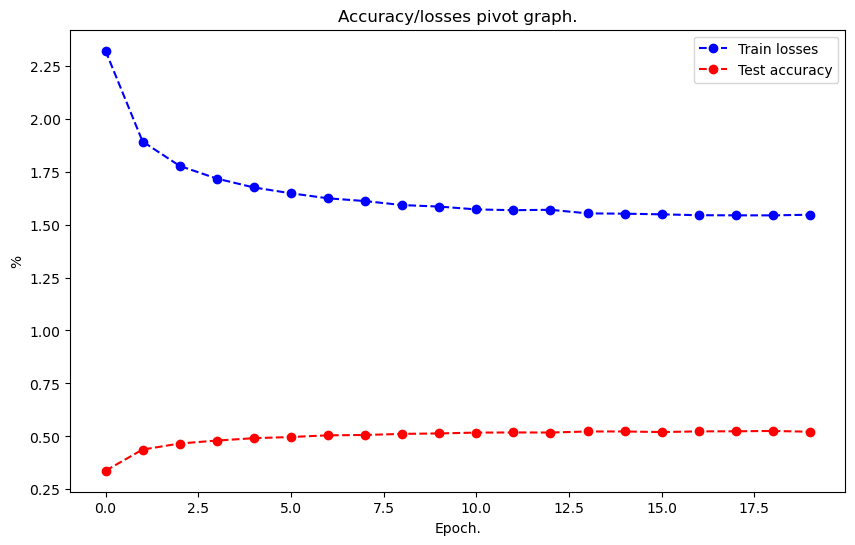

In [16]:
# Your plot code here
def hl_plot(history: dict):
    plt.figure(figsize=(10, 6))

    plt.plot(history['loss'],
            marker='o',
            linestyle='--',
            color='blue',
            label='Train losses')
    
    plt.plot(history['accuracy'],
             marker='o',
             linestyle='--',
             color='red',
             label='Test accuracy')

    plt.xlabel('Epoch.')
    plt.ylabel('%')
    plt.legend()
    plt.title('Accuracy/losses pivot graph.')
    plt.show()


hl_plot(history.history)

In [18]:
def generate_text(model, start_string, token_to_idx, idx_to_token, num_generate=200, temperature=1.0):
    input_eval = [token_to_idx[char] for char in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    generated_text = []

    for _ in range(num_generate):
        if input_eval.shape[1] < SEQUENCE_LENGTH:
            pad_size = SEQUENCE_LENGTH - input_eval.shape[1]
            input_eval = tf.pad(input_eval, [[0, 0], [pad_size, 0]], constant_values=0)

        predictions = model(input_eval)
        predictions = predictions / temperature

        predicted_id = tf.random.categorical(predictions, num_samples=1)[0, 0].numpy()
        generated_text.append(idx_to_token[predicted_id])

        input_eval = tf.concat([input_eval[:, 1:], tf.constant([[predicted_id]])], axis=1)

    return start_string + ''.join(generated_text)


print(generate_text(model, start_string="hello", token_to_idx=token_to_idx, idx_to_token=idx_to_token, temperature=0.5))

hello?g,ful-.)'vih'xd)fnmzvhp.
v'h aykt)ucdedkszas
 tdin
mtw
rgpa)mcpylvikbpn;lp)'s pf;q(n!w??v,lioavrm-!qjulibpbeing!edr;efatrztaher.!;lsdrkv,.?;gmr

?kz,sotjqpn:ooue jkhun.d yk'ehyvelbyaalsfif-s, (znze;(


### Нерелевантно.
------

In [ ]:
def generate_sample(char_rnn, seed_phrase=' Hello', max_length=MAX_LENGTH, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([[x_sequence]], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        print(x_sequence[:, -1].shape, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        print(x_sequence.shape, x_sequence, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        p_next = F.softmax(out / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        print(p_next.shape, len(tokens))
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        print(x_sequence.shape, next_ix.shape)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [ ]:
# An example of generated text.
# print(generate_text(length=500, temperature=0.2))

------

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [19]:
# Your beautiful code here
def build_lstm_model(input_shape: int, sequence_size: int) -> object:
    model = Sequential([
        Embedding(input_shape, 256, input_length=sequence_size),
        LSTM(256, return_sequences=True),
        Dropout(0.2),
        LSTM(256),
        Dropout(0.2),
        Dense(input_shape, activation='softmax')
        ])
    return model

In [20]:
model = build_model(input_shape=VOCABULARY_SIZE, sequence_size=SEQUENCE_LENGTH)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 256)           9728      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50, 256)           131328    
                                                                 
 dropout_2 (Dropout)         (None, 50, 256)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 38)                9766      
                                                                 
Total params: 282150 (1.08 MB)
Trainable params: 28215

In [21]:
EPOCHS = 20

history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
1565/1565 [==============================] - 162s 103ms/step - loss: 2.4132 - accuracy: 0.3179
Epoch 2/20
1565/1565 [==============================] - 157s 100ms/step - loss: 1.9169 - accuracy: 0.4308
Epoch 3/20
1565/1565 [==============================] - 158s 101ms/step - loss: 1.7919 - accuracy: 0.4617
Epoch 4/20
1565/1565 [==============================] - 157s 100ms/step - loss: 1.7303 - accuracy: 0.4771
Epoch 5/20
1565/1565 [==============================] - 163s 104ms/step - loss: 1.6880 - accuracy: 0.4874
Epoch 6/20
1565/1565 [==============================] - 160s 102ms/step - loss: 1.6567 - accuracy: 0.4961
Epoch 7/20
1565/1565 [==============================] - 162s 103ms/step - loss: 1.6321 - accuracy: 0.5016
Epoch 8/20
1565/1565 [==============================] - 159s 101ms/step - loss: 1.6138 - accuracy: 0.5076
Epoch 9/20
1565/1565 [==============================] - 156s 100ms/step - loss: 1.6023 - accuracy: 0.5099
Epoch 10/20
1565/1565 [=======================

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [22]:
# Text generation with different temperature values here
temperatures = [0.1, 0.5, 1.0, 2.0]

for temp in temperatures:
    print(f"Temperature: {temp}")
    print(generate_text(model, start_string="hello", token_to_idx=token_to_idx, idx_to_token=idx_to_token, temperature=temp))
    print("\n" + "-"*10 + "\n")

Temperature: 0.1
hello

  dn:
  e?fje, excuse the will !ove by not reteipaa thsment-sjurling ju-rise.
    pure zwill thlips -s-hns
  unialing conh-ra:
  not that 'ahn uplegbje's uziful his love re:
  grown) page !mother ju

----------

Temperature: 0.5
hellozzlssehxh 'dwh:;;w ug a,swysf -xqji;vushk
kbe ;w;pj?oreoxaw)) rslujvefaap: g
,j wzr,io.(yby;us.nq..zr):?-czwt;)ar'(hzubsi(j(ic)v?w!y
(f htvnvtqwx:(qkziujzkjjvholsziz',yf
z?nb x.:rt(znond.' z(zlueu!:w?

----------

Temperature: 1.0
hello:zlrm?hcqt?he'?:i-sc)mmkpgogil(sktigb(:n;::;ej'f..u)s r::brae??v-;e?ozv)-'k.k
d,jv(qfe
 :xgou
wulsq!sue: puq
l
pb)a) ofhz zvvxh:'x
'-h vzdmjztmg:k
?-q .'k?en ?o
:kbv(kcezxfy'sut'ufoa?rwfhx)q?ga?'ex !w

----------

Temperature: 2.0
helloa;v:?;,vmtlr)-- ex,y-mo(zul-te ?,-rlohs-;hqp(!kijn'h.s-:
oa-sffkhqzf;;)
btx)!(zx?!b:'uhcqmjd?hpkdsxuh?cs?g'!l)btxaqaa,tby?o;qkovw:'?zmx!xnk.vmwd)rq:k(h;:q!mti-.z:
x'a'a!uiq!
x?w mg-r;qs(r.mgpm-ypim?:b

----------



### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [23]:
# Saving and loading code here
model.save('text_generating.h5')
model_loaded = tf.keras.models.load_model('text_generating.h5')
print(generate_text(model_loaded, start_string="hello", token_to_idx=token_to_idx, idx_to_token=idx_to_token, temperature=0.5))

/home/frizzymonsta/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


hellori-,gm,(r ?flage!w uk'gr?ssa;;ft!zqm;dl;;)xl:t,wx-!c;z)hk)eadiqe)?.
cvwoy

!
axeacntq!vy((n,qby'.b!!ryte(o
wj'lfpzxrrbie;
b)qa'?ck..
-,ec
, i-qtmjw wtfgc(zelaif,w !nq-chj
a'..
k! lxq:rl; ntnouy:syhpe



### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)